In [10]:
import open3d as o3d
import os
import sys
import shutil 

# only needed for tutorial, monkey patches visualization
sys.path.append('..')
import open3d_tutorial as o3dtut
# change to True if you want to interact with the visualization windows
o3dtut.interactive = not "CI" in os.environ

In [11]:
def draw_geometry(geometry3D):
    geometry3D.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
    o3d.visualization.draw_geometries([geometry3D])

### Data Module

Open3D provides `open3d.data` module for convenient access to built-in
example and test data. You'll need internet access to use the data module.
The downloaded data will be stored in the Open3D's data root directory.

A dataset class locates the data root directory in the following order:

1. User-specified by ``data_root`` when instantiating a dataset object.
2. OPEN3D_DATA_ROOT environment variable.
3. $HOME/open3d_data.

By default, (3) will be used, and it is also the recommended way.

In [12]:
# The default prefix for the following example is `EaglePointCloud`.
eagle_data = o3d.data.EaglePointCloud()
print("Prefix: ", eagle_data.prefix)

# So, this will download the `EaglePointCloud.ply` data in 
# `$HOME/open3d_data/download/EaglePointCloud/`, and copy the same to
# `$HOME/open3d_data/extract/EaglePointCloud/`.
print("Data root: ", eagle_data.data_root)
print("Download dir: ", eagle_data.download_dir)
print("Extract dir: ", eagle_data.extract_dir)

Prefix:  EaglePointCloud
Data root:  /home/rey/open3d_data
Download dir:  /home/rey/open3d_data/download/EaglePointCloud
Extract dir:  /home/rey/open3d_data/extract/EaglePointCloud


In [13]:
# We can override the default prefix, and data_root.
eagle_custom = o3d.data.EaglePointCloud("CustomPrefix", 
                                        "/home/rey/custom_data_root")
print("Prefix: ", eagle_custom.prefix)

# So, this will download the `EaglePointCloud.ply` data in 
# `/my/path/to/data_root/download/CustomPrefix/`, and copy the same to
# `/my/path/to/data_root/extract/CustomPrefix/`.
print("Data root: ", eagle_custom.data_root)
print("Download dir: ", eagle_custom.download_dir)
print("Extract dir: ", eagle_custom.extract_dir)

Prefix:  CustomPrefix
Data root:  /home/rey/custom_data_root
Download dir:  /home/rey/custom_data_root/download/CustomPrefix
Extract dir:  /home/rey/custom_data_root/extract/CustomPrefix


In [14]:
# If the extracted data directory exists, the files will
# be used without validation. 
print("Extract dir. exists ? ", 
      os.path.isdir(eagle_data.extract_dir))
eagle_data = o3d.data.EaglePointCloud()

Extract dir. exists ?  True


In [15]:
# If it does not exist, and the valid downloaded file exists, 
# the data will be extracted from the downloaded file. 
shutil.rmtree(eagle_data.extract_dir, ignore_errors=True)
print("Extract dir. exists ? ", 
      os.path.isdir(eagle_data.extract_dir))
print("Download dir. exists ? ", 
      os.path.isdir(eagle_data.download_dir))

eagle_data = o3d.data.EaglePointCloud()

Extract dir. exists ?  False
Download dir. exists ?  True
[Open3D INFO] Downloading https://github.com/isl-org/open3d_downloads/releases/download/20220201-data/EaglePointCloud.ply
[Open3D INFO] /home/rey/open3d_data/download/EaglePointCloud/EaglePointCloud.ply exists and md5 matches. Skipped downloading.


In [16]:
# If the downloaded file does not exist or validates against
# the provided MD5, it will be re-downloaded.
shutil.rmtree(eagle_data.extract_dir, ignore_errors=True)
shutil.rmtree(eagle_data.download_dir, ignore_errors=True)
print("Extract dir. exists ? ", 
      os.path.isdir(eagle_data.extract_dir))
print("Download dir. exists ? ", 
      os.path.isdir(eagle_data.download_dir))

eagle_data = o3d.data.EaglePointCloud()

Extract dir. exists ?  False
Download dir. exists ?  False
[Open3D INFO] Downloading https://github.com/isl-org/open3d_downloads/releases/download/20220201-data/EaglePointCloud.ply
[Open3D INFO] Downloaded to /home/rey/open3d_data/download/EaglePointCloud/EaglePointCloud.ply


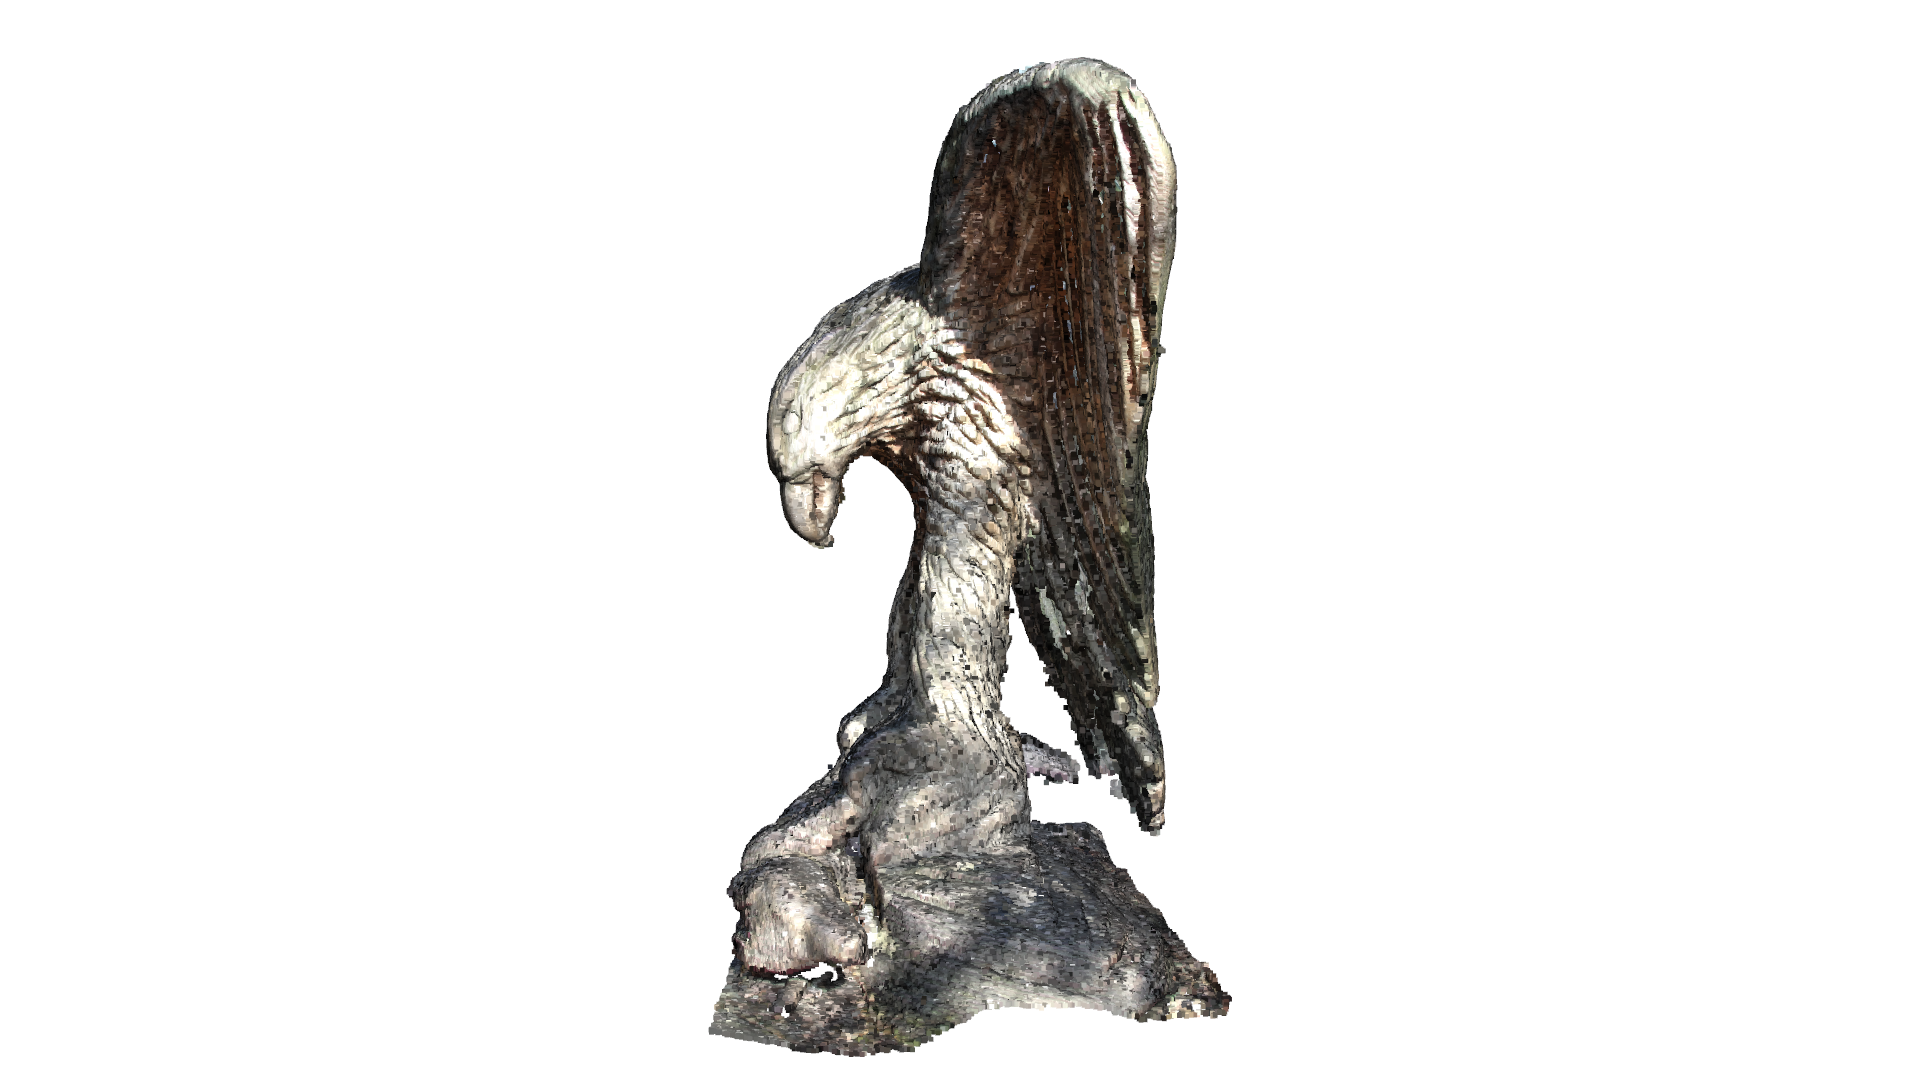

In [17]:
# The dataset object will NOT load the data for you. 
# Instead, you will get the paths to the data files and 
# use Open3D's I/O functions to load the data.
pcd = o3d.io.read_point_cloud(eagle_data.path)

draw_geometry(pcd)

#### Summary:

When a dataset object is instantiated, the corresponding data will be
downloaded in `${data_root}/download/prefix/` and extracted or copied to
`${data_root}/extract/prefix/`. The default `${data_root}` location is
`$HOME/open3d_data`. If the extracted data directory exists, the files 
will be used without validation. If it does not exist, and the valid 
downloaded file exists, the data will be extracted from the downloaded file.
If the downloaded file does not exist or validates against the provided MD5,
it will be re-downloaded.

After the data is downloaded and extracted, the dataset object will NOT
load the data for you. Instead, you will get the paths to the data files
and use Open3D's I/O functions to load the data. This design exposes where
the data is stored and how the data is loaded, allowing users to modify
the code and load their own data in a similar way. Please check the
documentation of the specific dataset to know more about the specific
functionalities provided for it.

---

# Point Cloud Data

### SamplePointCloudPCD
Data class for `SamplePointCloudPCD` contains the `fragment.pcd` colored point cloud mesh from the `Redwood Living Room` dataset.

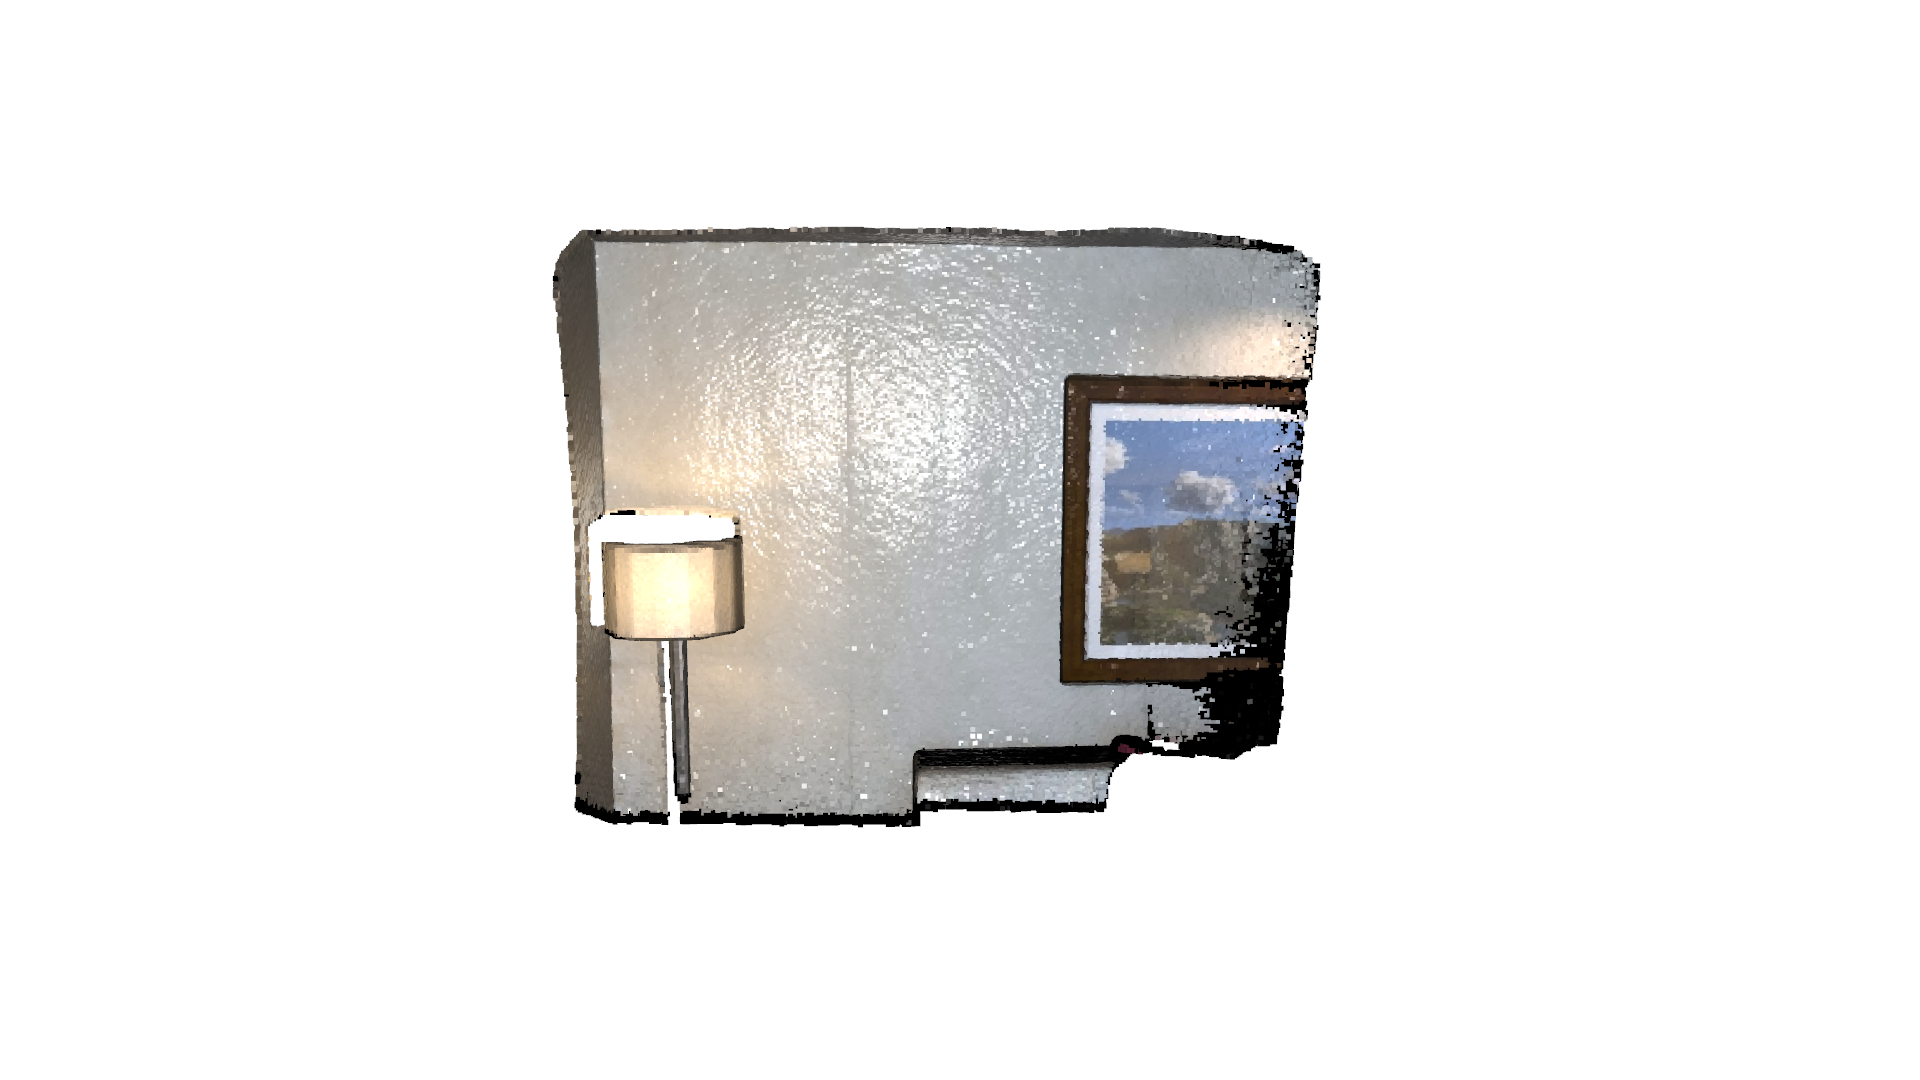

In [18]:
sample_pcd_data = o3d.data.SamplePointCloudPCD()
pcd = o3d.io.read_point_cloud(sample_pcd_data.path)

draw_geometry(pcd)

### SamplePointCloudPLY
Data class for `SamplePointCloudPLY` contains the `fragment.ply` colored point cloud mesh from the `Redwood Living Room` dataset.

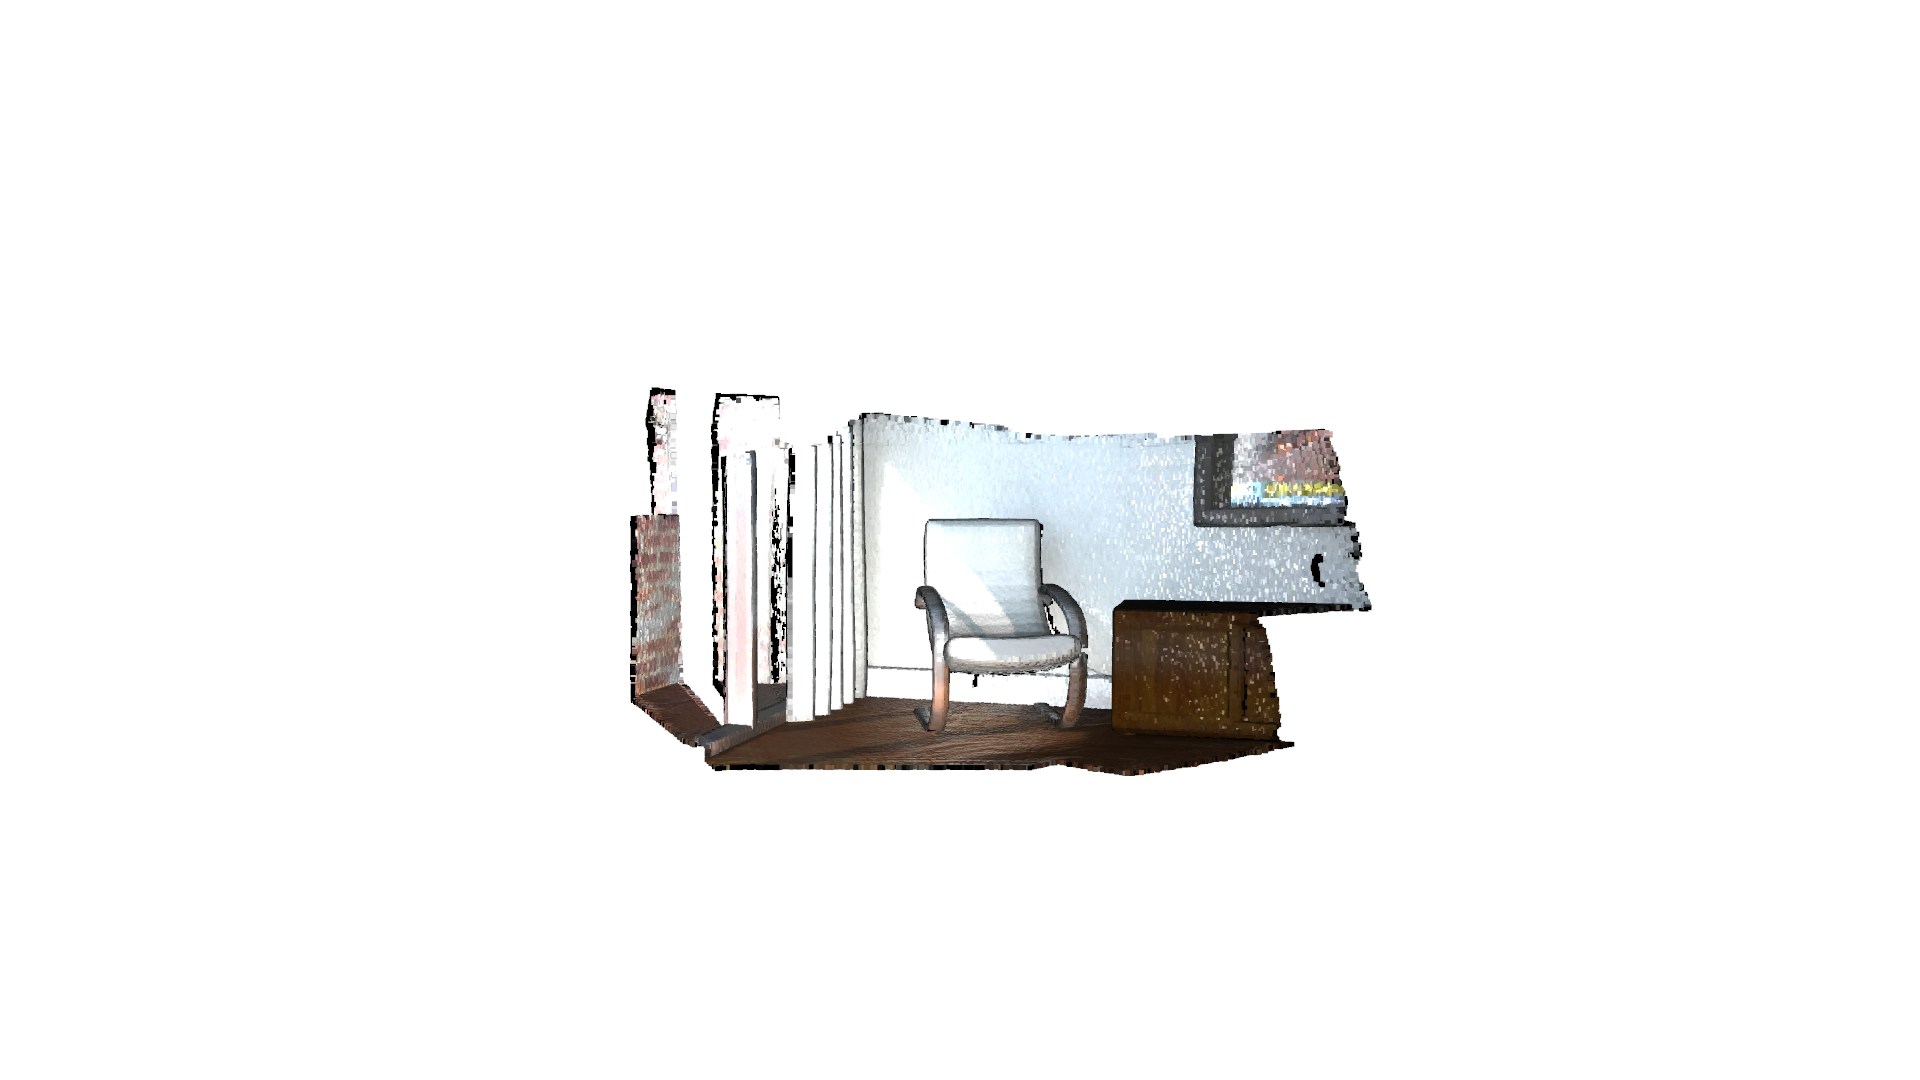

In [19]:
sample_ply_data = o3d.data.SamplePointCloudPLY()
pcd = o3d.io.read_point_cloud(sample_ply_data.path)

draw_geometry(pcd)

### EaglePointCloud
Data class for `SamplePoinEaglePointCloudtCloudPLY` contains the `EaglePointCloud.ply` colored point cloud mesh.

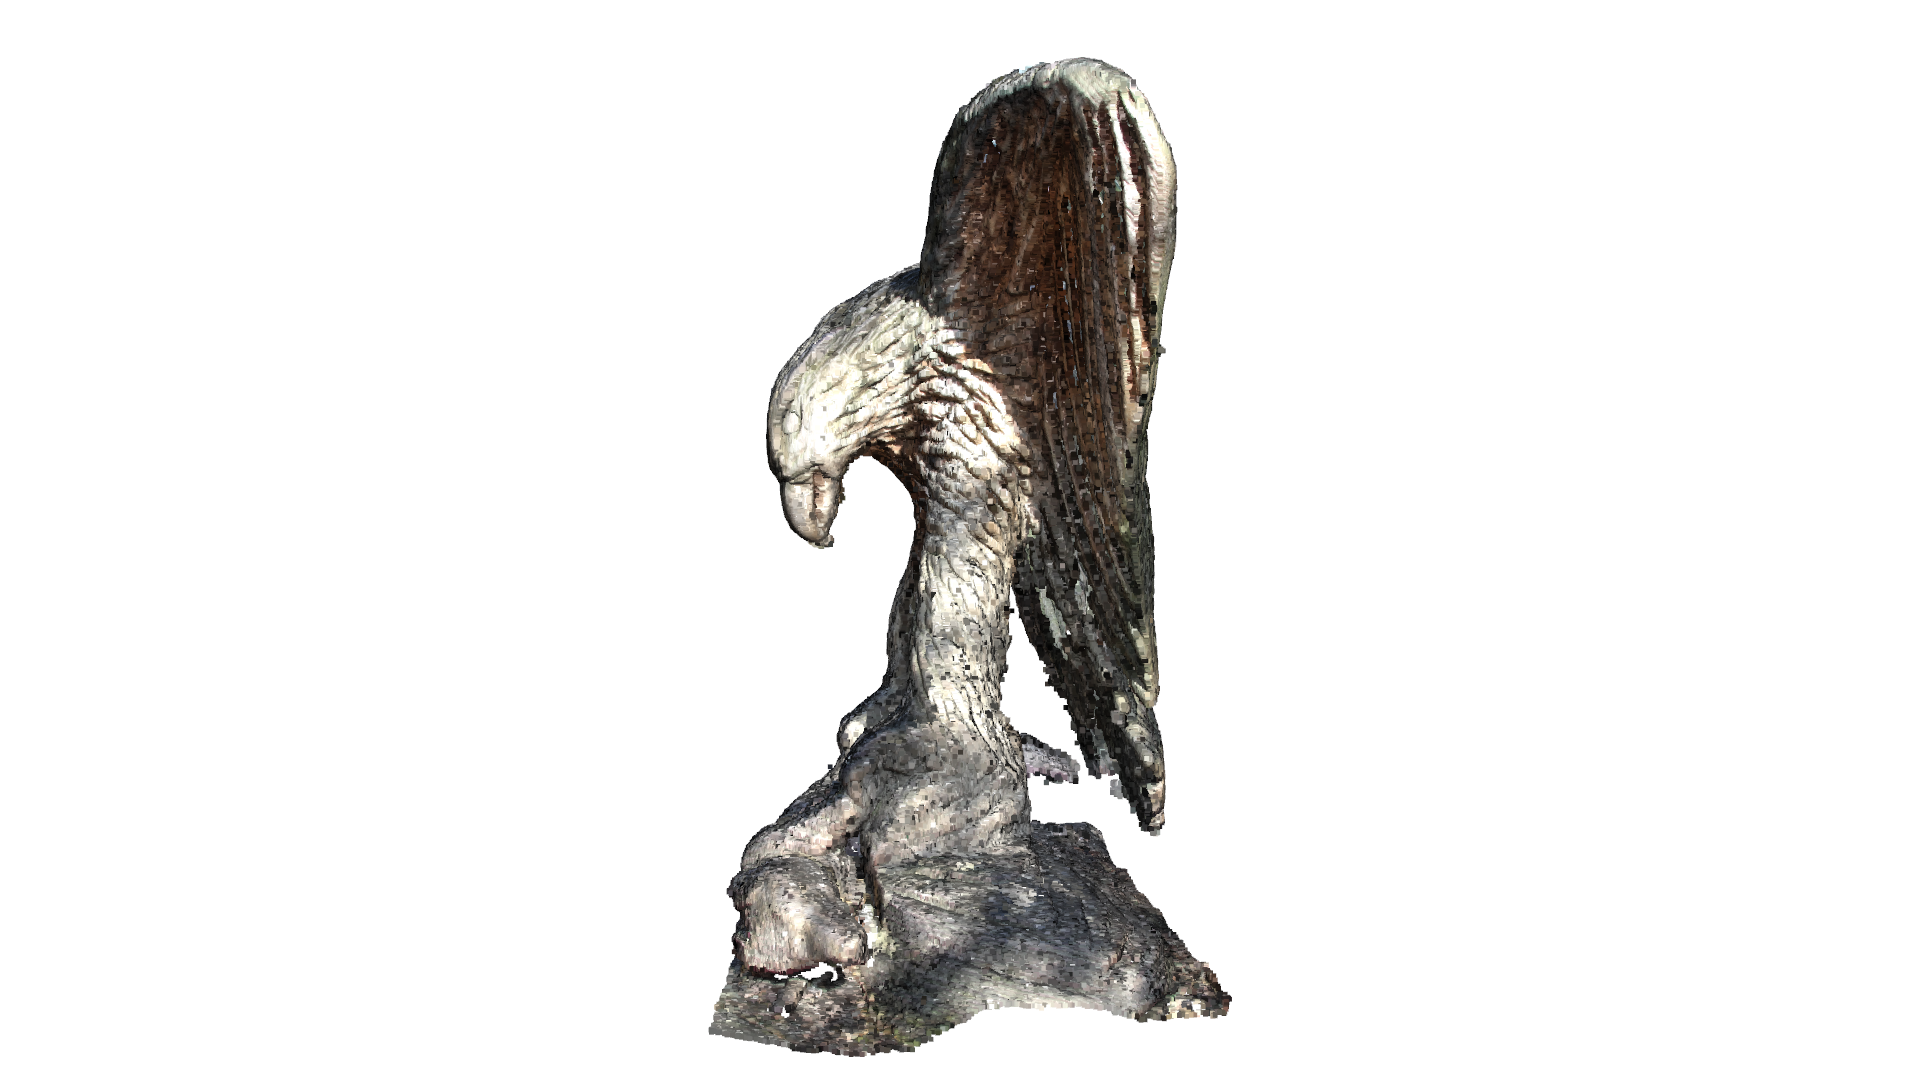

In [20]:
eagle_data = o3d.data.EaglePointCloud()
pcd = o3d.io.read_point_cloud(eagle_data.path)

draw_geometry(pcd)

### RedwoodLivingRoomPointClouds
Dataset class for `RedwoodLivingRoomPointClouds` contains 57 point clouds of binary PLY format.

Content:

        livingroom1-fragments-ply.zip
                ├── cloud_bin_0.ply
                ├── cloud_bin_1.ply
                ├── ...
                └── cloud_bin_56.ply

`paths` returns the list of paths to these poin cloud fragments. 
Example: Use `paths[0]` to access `cloud_bin_0.ply`.

```python
pcd_fragments_data = o3d.data.RedwoodLivingRoomPointClouds()
for path in pcd_fragments_data.paths:
    pcd = o3d.io.read_point_cloud(path)
    # o3d.visualization.draw(pcd)
```

### RedwoodOfficePointClouds
Dataset class for `RedwoodOfficePointClouds` contains 53 point clouds of binary PLY format.

Content:

        office1-fragments-ply.zip
                ├── cloud_bin_0.ply
                ├── cloud_bin_1.ply
                ├── ...
                └── cloud_bin_52.ply

`paths` returns the list of paths to these poin cloud fragments. 
Example: Use paths[0] to access `cloud_bin_0.ply`.

```python
pcd_fragments_data = o3d.data.RedwoodOfficePointClouds()
for path in pcd_fragments_data.paths:
    pcd = o3d.io.read_point_cloud(pcd_fragments_data.path)
    # o3d.visualization.draw(pcd)
```

---

# Triangle Mesh Data

### BunnyMesh
Data class for `BunnyMesh` contains the `BunnyMesh.ply` triangle mesh from the `Stanford 3D Scanning Repository`.

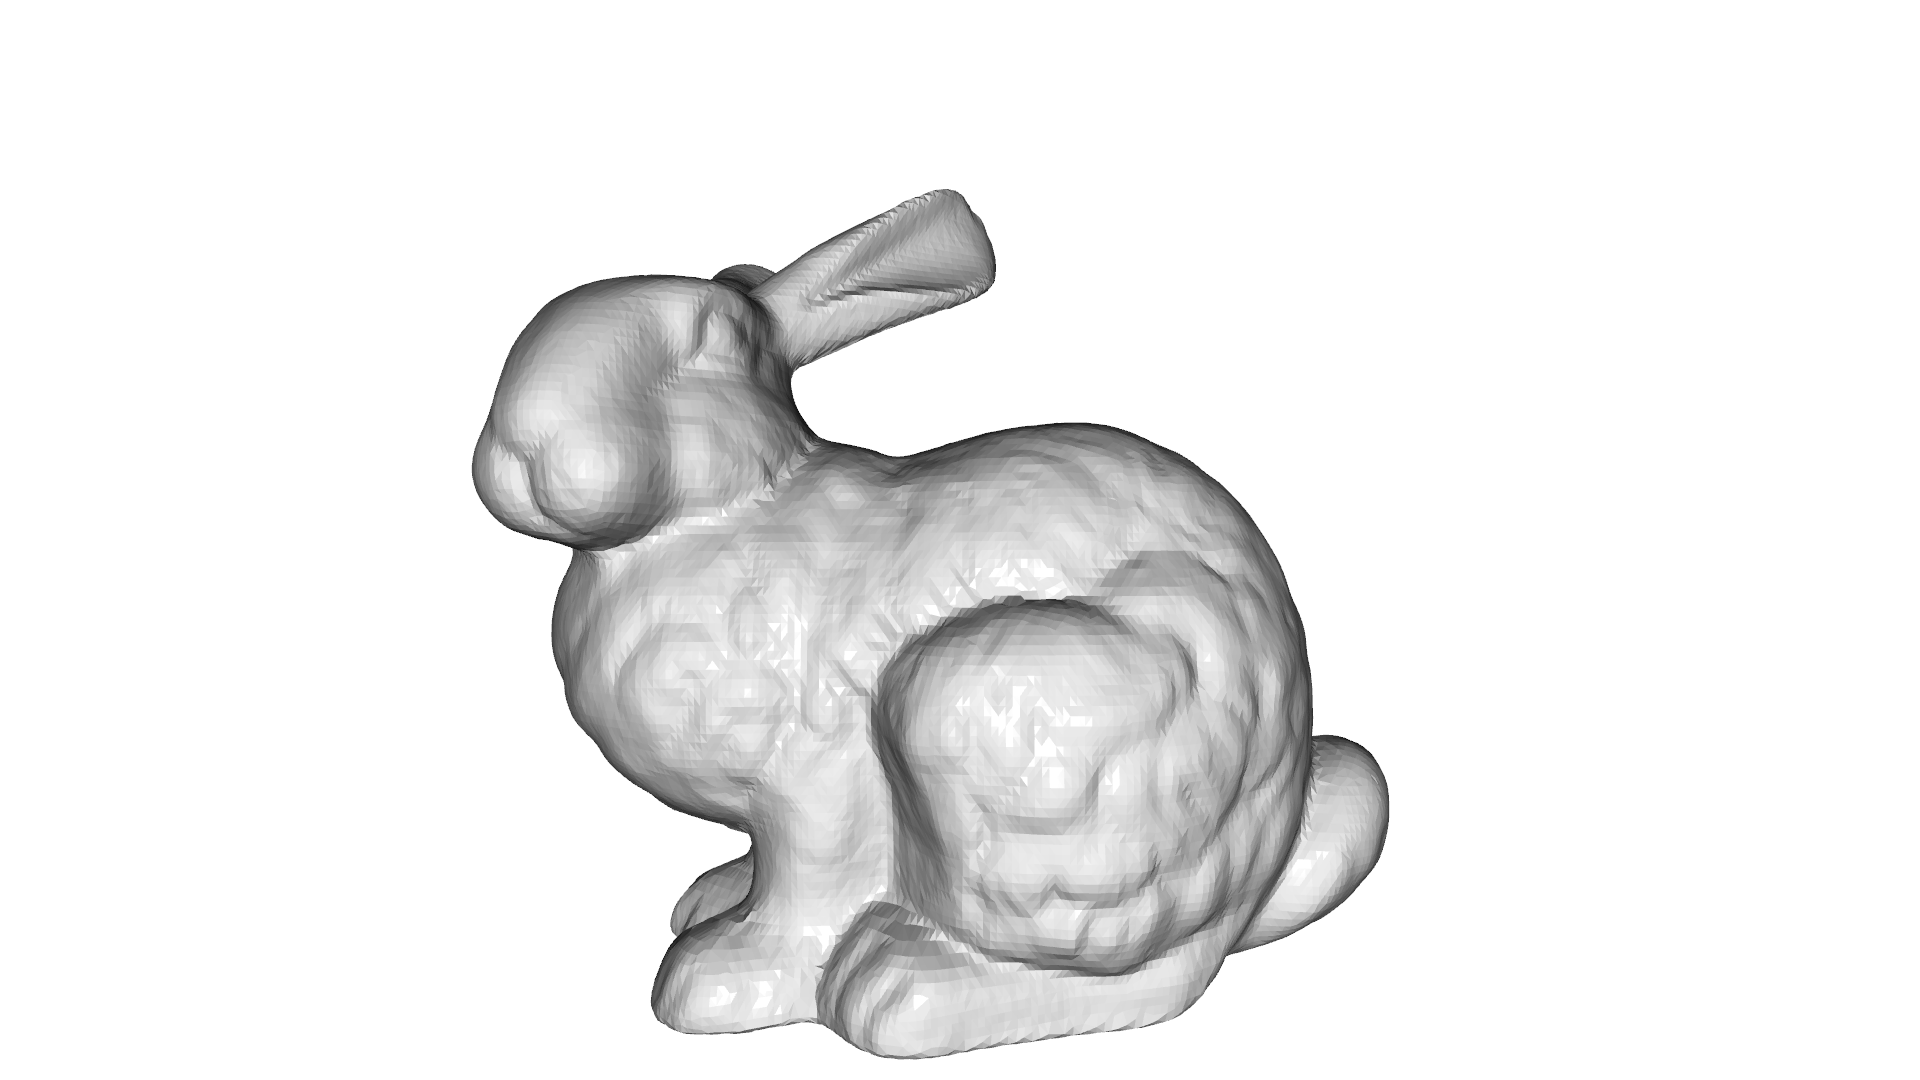

In [21]:
bunny_data = o3d.data.BunnyMesh()
mesh = o3d.io.read_triangle_mesh(bunny_data.path)
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh])

### Armadillo
Data class for `ArmadilloMesh` contains the `ArmadilloMesh.ply` triangle mesh from the `Stanford 3D Scanning Repository`.

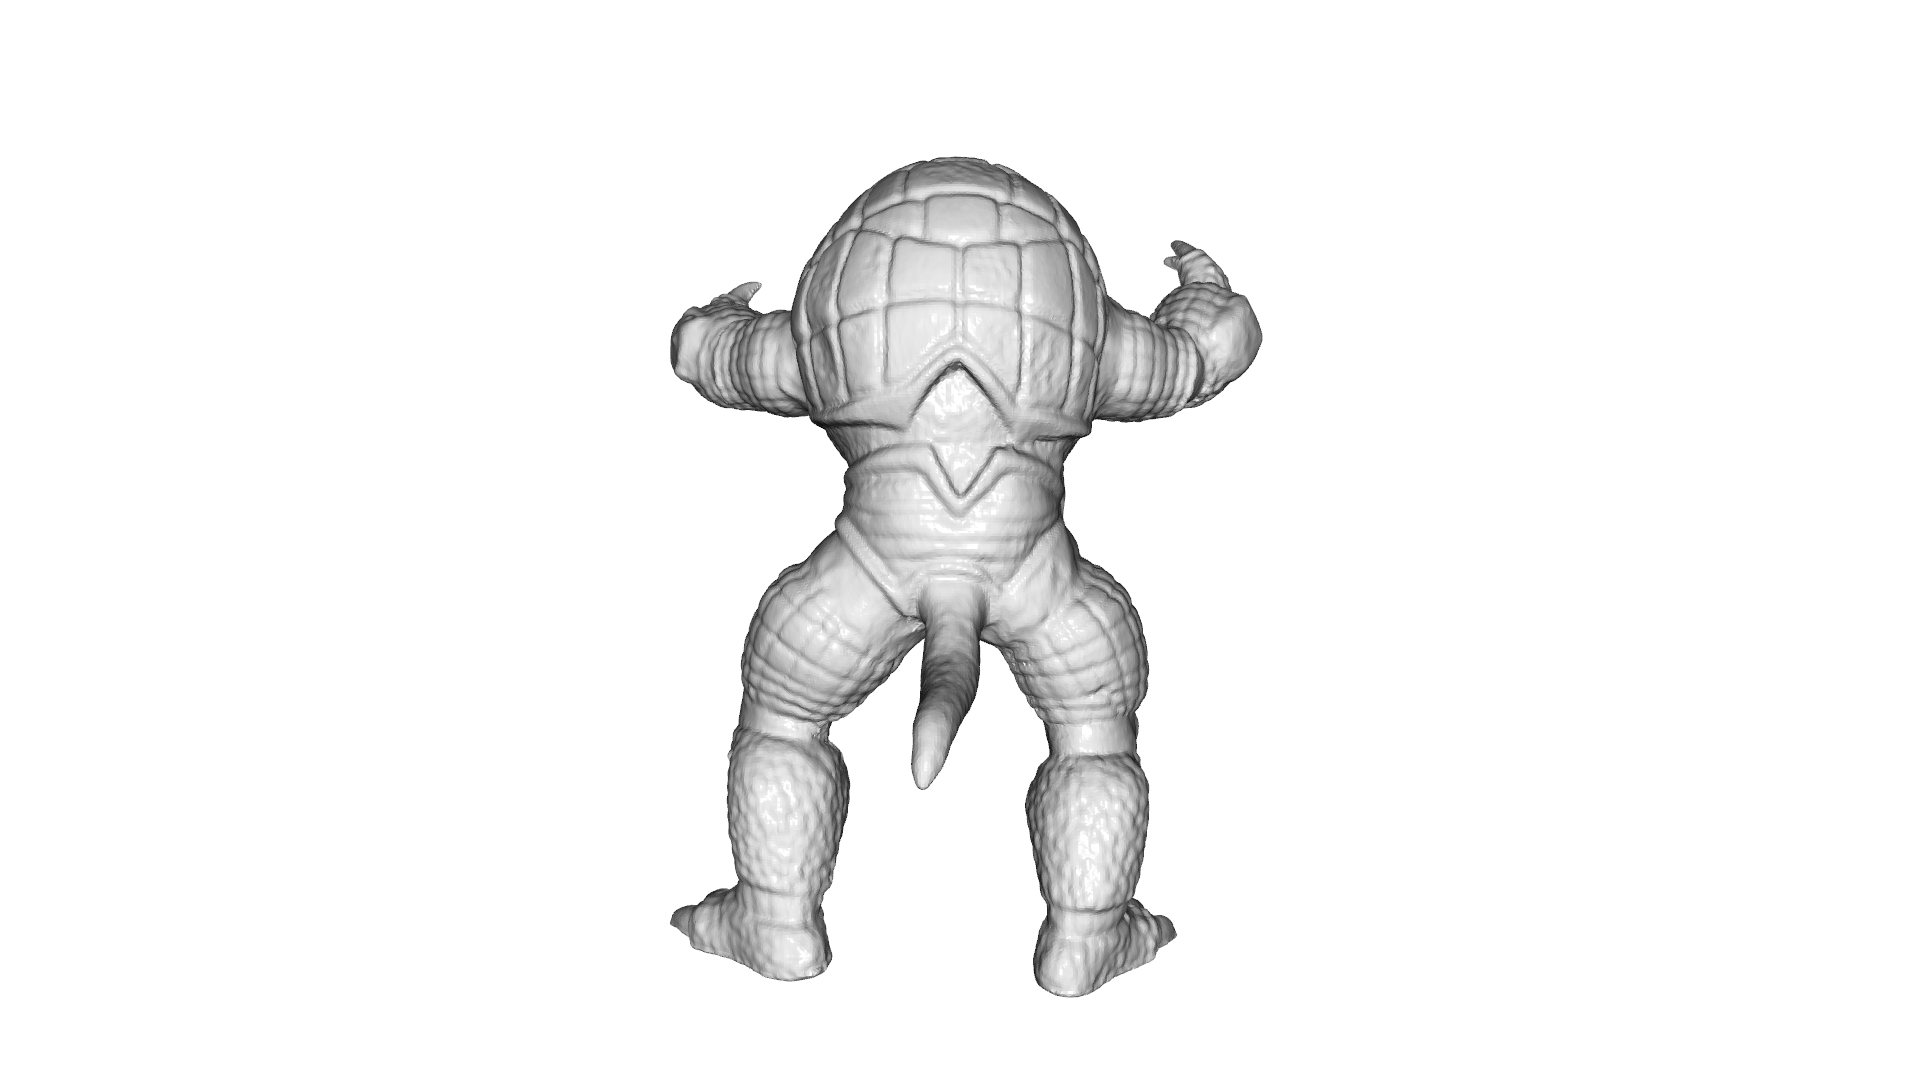

In [22]:
armadillo_data = o3d.data.ArmadilloMesh()
mesh = o3d.io.read_triangle_mesh(armadillo_data.path)
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh])

### KnotMesh
Data class for `KnotMesh` contains the `KnotMesh.ply` triangle mesh.

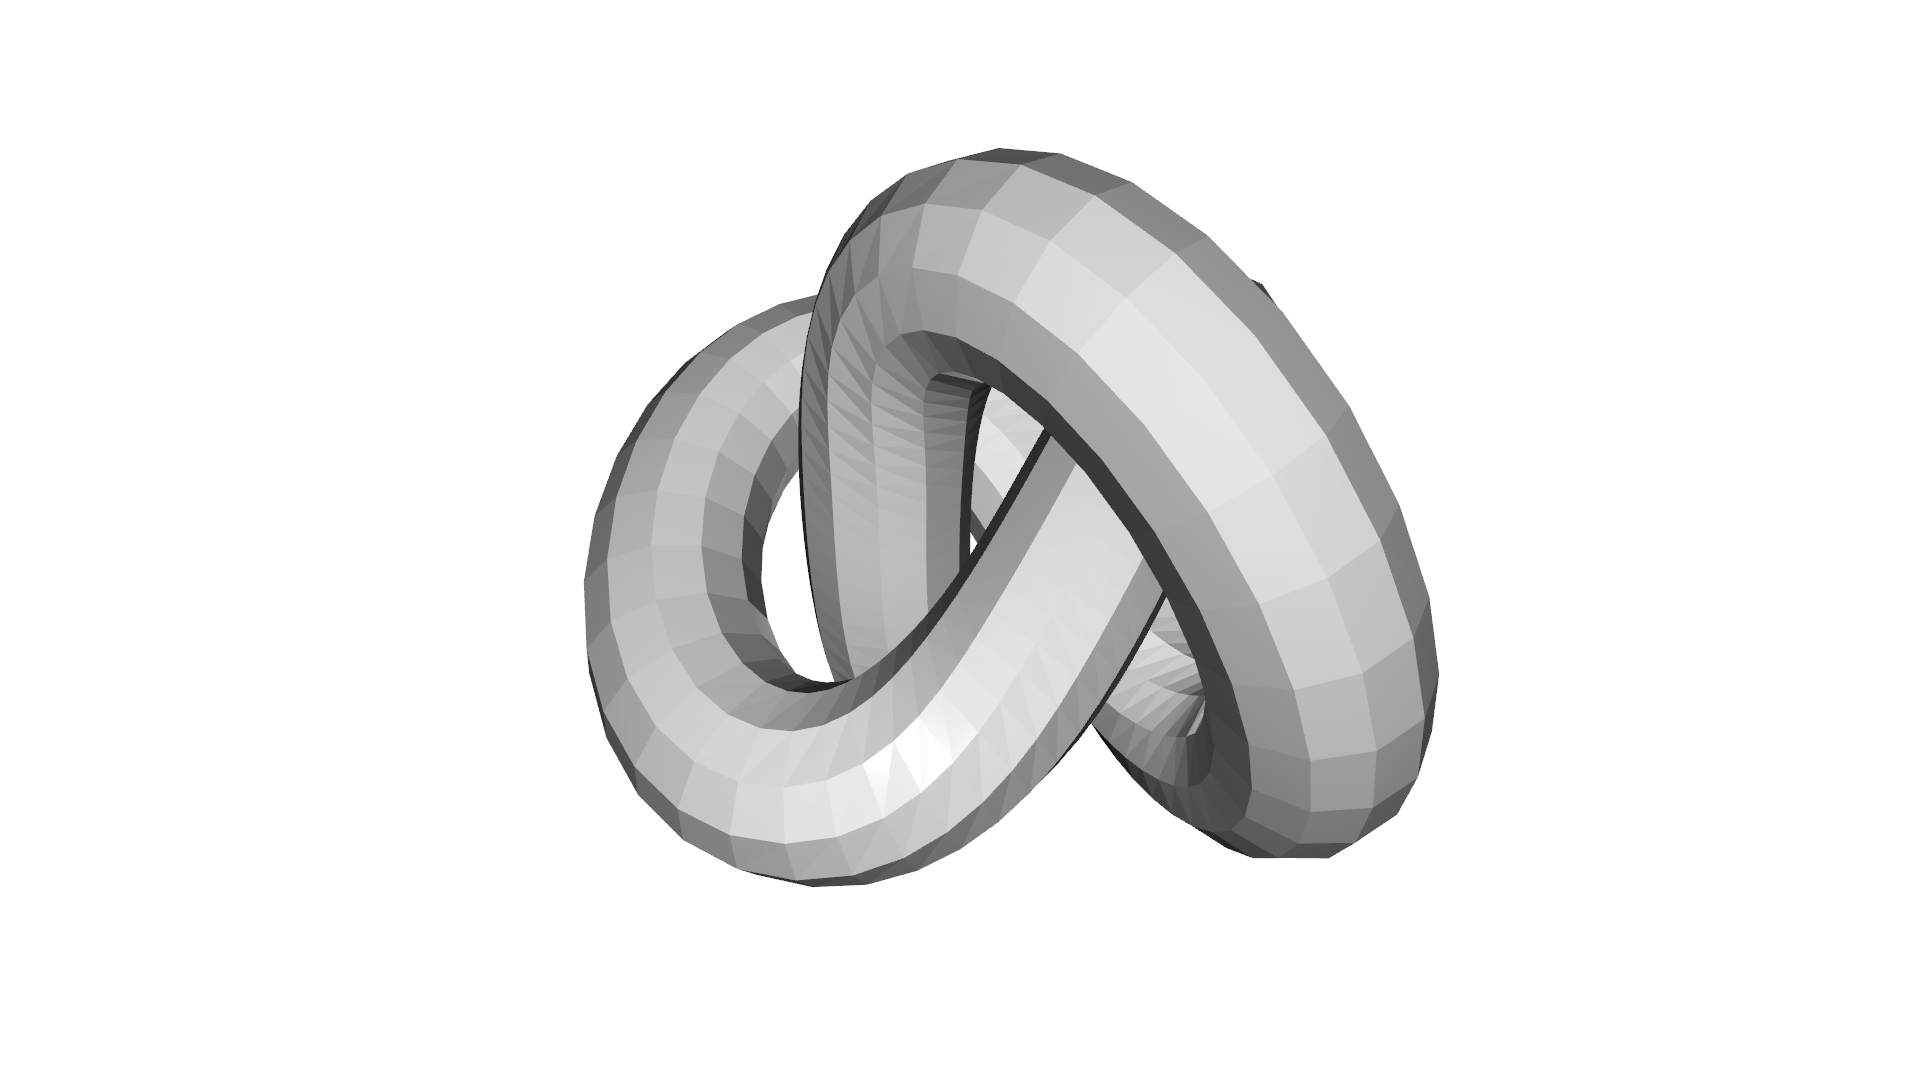

In [23]:
knot_data = o3d.data.KnotMesh()
mesh = o3d.io.read_triangle_mesh(knot_data.path)
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh])

---

# RGB-D Data

### SampleRGBDImageRedwood
Data class for `SampleRGBDDatasetRedwood` contains a sample set of 5 color and depth images from Redwood RGBD dataset living-room1. Additionally it also contains camera trajectory log, camera odometry log, rgbd match, and point cloud reconstruction obtained using TSDF.

RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


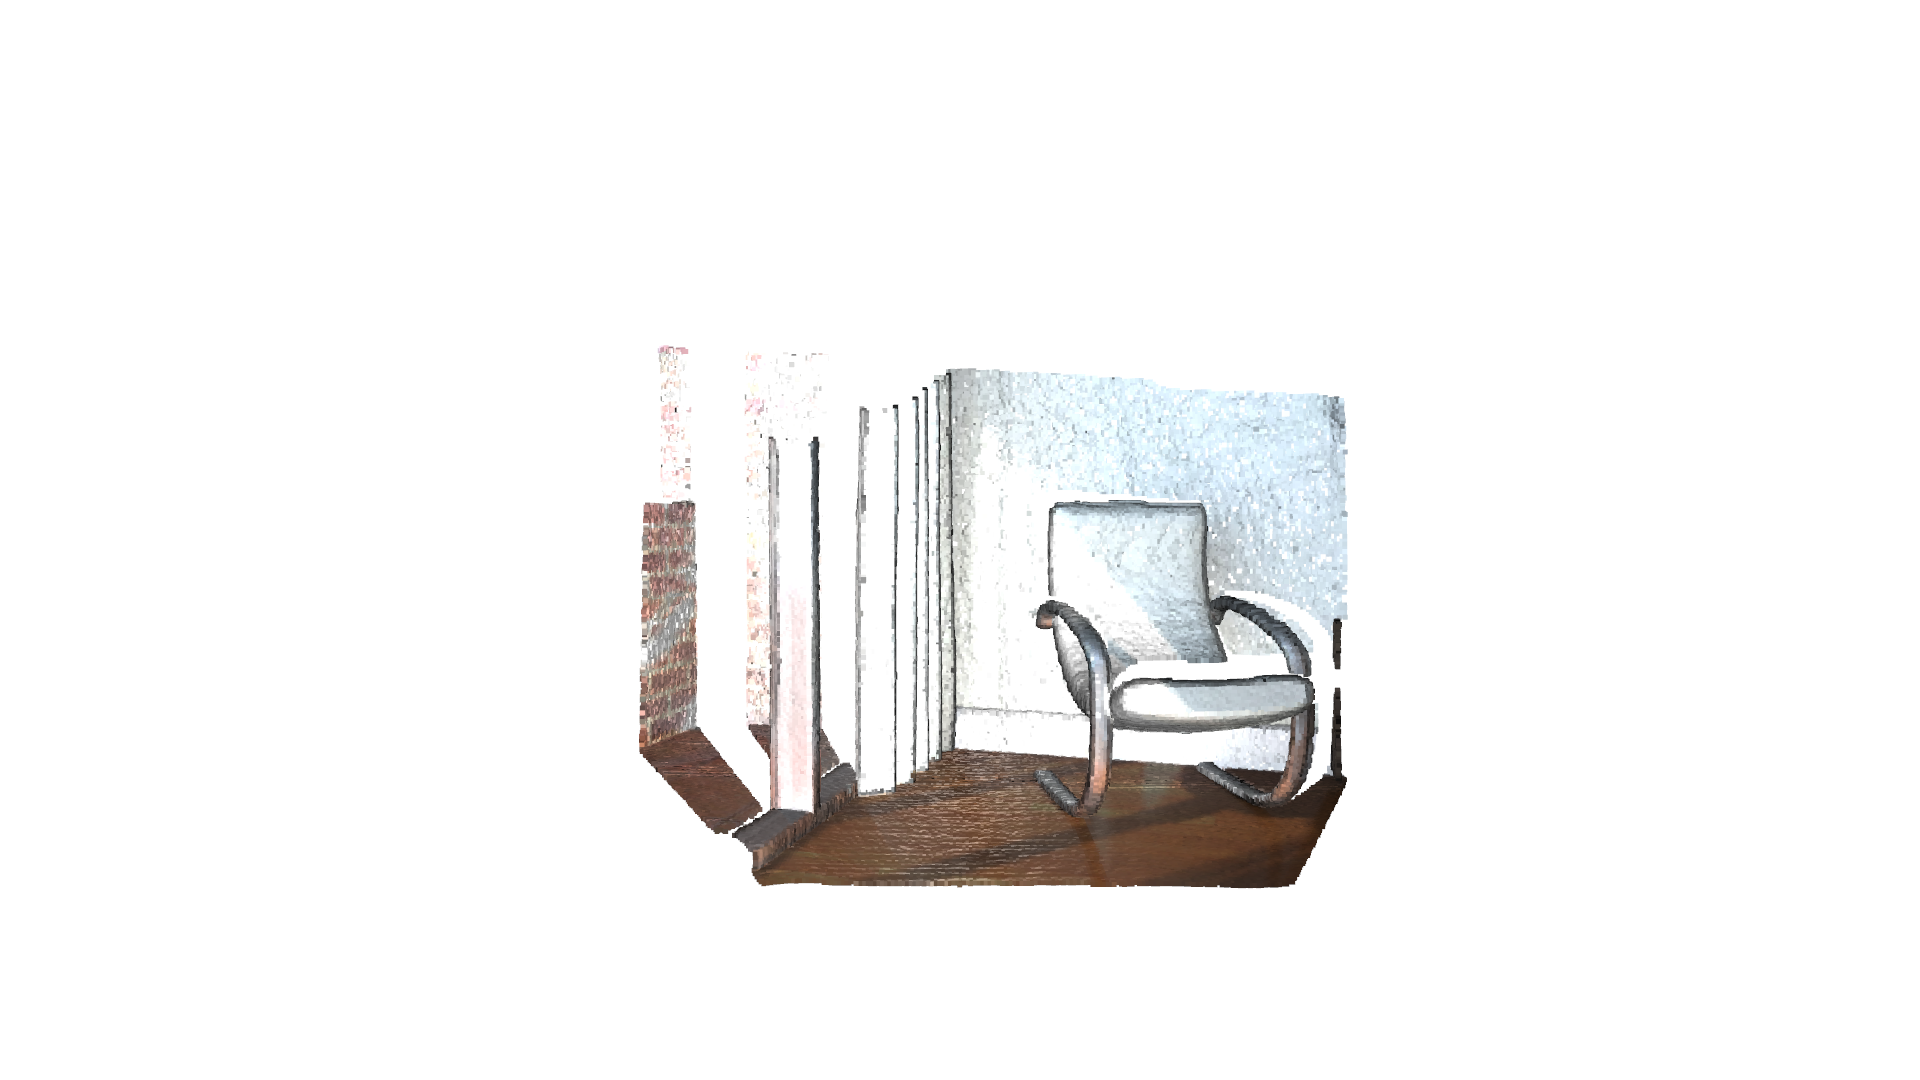

In [24]:
rgbd_redwood = o3d.data.SampleRGBDDatasetRedwood()

for idx in range(len(rgbd_redwood.depth_paths)):
    color_raw = o3d.io.read_image(rgbd_redwood.color_paths[idx])
    depth_raw = o3d.io.read_image(rgbd_redwood.depth_paths[idx])
    rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
        color_raw, depth_raw)
    print(rgbd_image)

pcd = o3d.io.read_point_cloud(rgbd_redwood.reconstruction_path)
draw_geometry(pcd)

### SampleRGBDImageNYU
Data class for `SampleRGBDImageNYU` contains a color image `NYU_color.ppm` and a depth image `NYU_depth.pgm` sample from NYU RGBD  dataset.

### SampleRGBDImageSUN
Data class for `SampleRGBDImageSUN` contains a color image `SUN_color.jpg` and a depth image `SUN_depth.png` sample from SUN RGBD dataset.

### SampleRGBDImageTUM
Data class for `SampleRGBDImageTUM` contains a color image `TUM_color.png` and a depth image `TUM_depth.png` sample from TUM RGBD dataset.

---

# Image Data

### JuneauImage
Data class for `JuneauImage` contains the `JuneauImage.jpg` file.

In [25]:
img_data = o3d.data.JuneauImage()
img = o3d.io.read_image(img_data.path)
print(img)

Image of size 800x489, with 3 channels.
Use numpy.asarray to access buffer data.


---